# **1. Data Import and Exploration**

In [59]:
# Packages import
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-poster')

<ipython-input-59-68b98416d766>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [87]:
# Data Import

df = pd.read_csv("./Data/NVDA.csv", parse_dates=['Date'])
df.head()

FileNotFoundError: [Errno 2] No such file or directory: './Data/NVDA.csv'

In [61]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,252,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,2023-12-18 07:31:25.714285824,63.562135,64.641992,62.399080,63.636135,63.626880,4.722430e+08
min,2023-06-20 00:00:00,40.450001,40.879002,39.230000,40.326000,40.317253,1.982090e+08
25%,2023-09-18 18:00:00,45.043500,45.914000,44.467251,45.443250,45.429648,3.759270e+08
50%,2023-12-16 12:00:00,49.390001,49.730499,48.421999,49.180500,49.169958,4.375680e+08
75%,2024-03-19 06:00:00,85.559748,87.769249,83.711500,85.839000,85.831949,5.332628e+08
max,2024-06-18 00:00:00,132.990005,136.330002,130.690002,135.580002,135.580002,1.156044e+09
std,NaN,23.848359,24.353191,23.298533,23.961241,23.962816,1.494140e+08


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       252 non-null    float64       
 2   High       252 non-null    float64       
 3   Low        252 non-null    float64       
 4   Close      252 non-null    float64       
 5   Adj Close  252 non-null    float64       
 6   Volume     252 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


# **2. Data Cleaning and Processing**

In [63]:
# Missing Values Finding

df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


<Axes: >

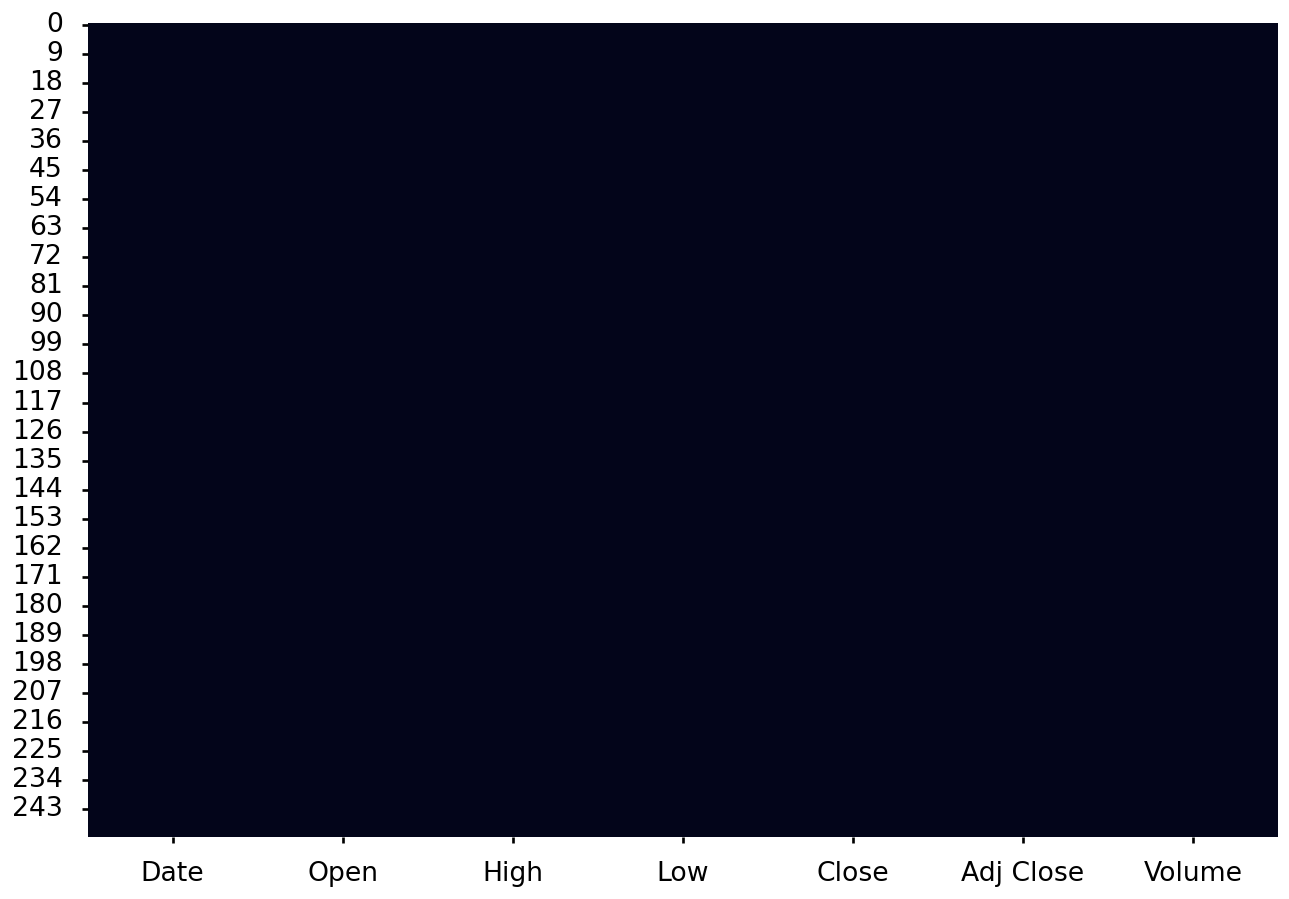

In [64]:
sns.heatmap(df.isna(), cbar=False)

In [65]:
# Convert Date Column to Index

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-20,42.998001,43.990002,42.674000,43.807999,43.794884,451153000
2023-06-21,43.500999,43.615002,42.080002,43.044998,43.032116,551603000
2023-06-22,42.252998,43.425999,42.234001,43.025002,43.012127,417737000
2023-06-23,42.464001,42.808998,42.014999,42.209000,42.196365,358140000
2023-06-26,42.460999,42.764000,40.099998,40.632000,40.619839,594322000


# **3. Exploratory Data Analysis**

In [66]:
# Resampling Index into Day, Month, Quarter, and Year

df_daily = df.resample('D').mean()
df_monthly = df.resample('M').mean()
df_yearly = df.resample('Y').mean()

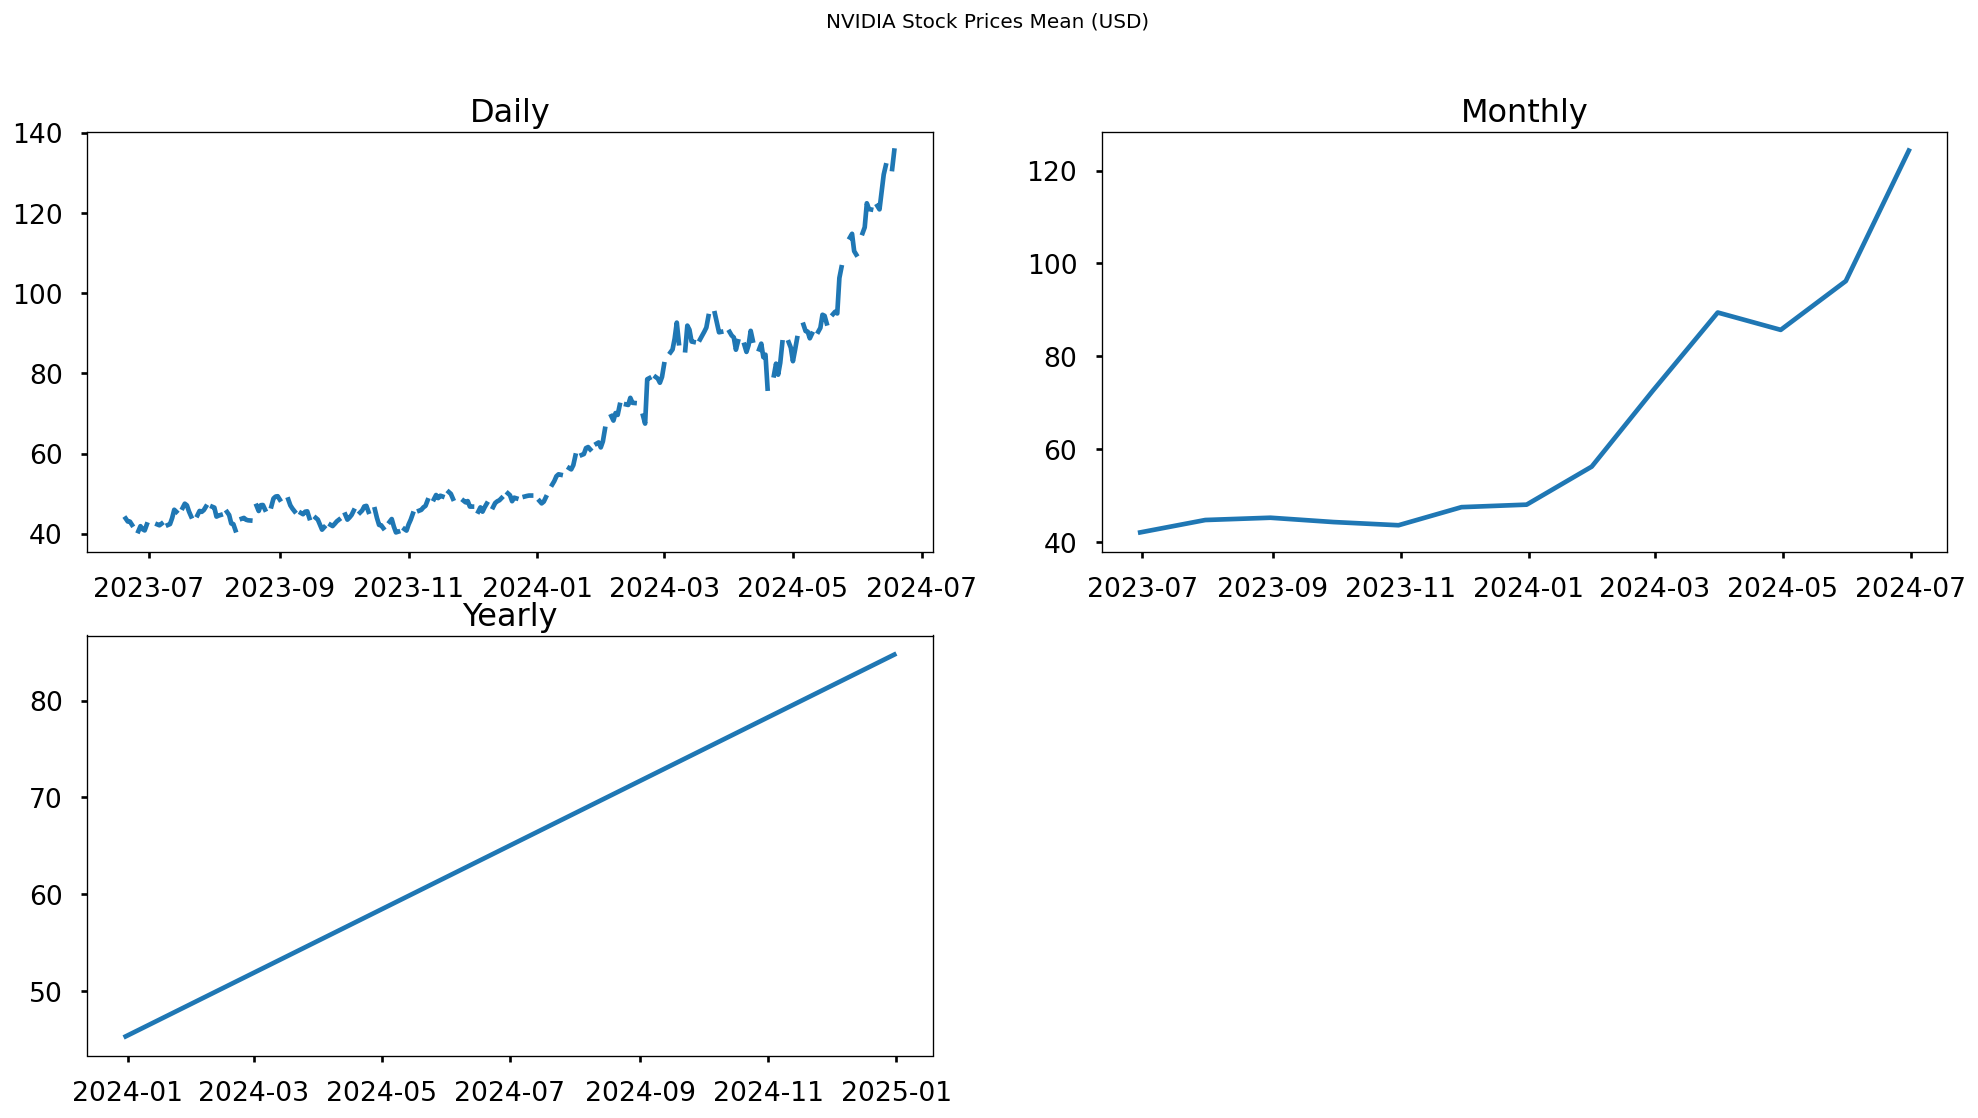

In [67]:
# Plotting to See Average Stock Prices each category

plt.figure(figsize=(20,10))
plt.suptitle('NVIDIA Stock Prices Mean (USD)')

plt.subplot(221)
plt.plot(df_daily.index, df_daily['Close'])
plt.title('Daily')

plt.subplot(222)
plt.plot(df_monthly.index, df_monthly['Close'])
plt.title('Monthly')

plt.subplot(223)
plt.plot(df_yearly.index, df_yearly['Close'])
plt.title('Yearly')

plt.show()

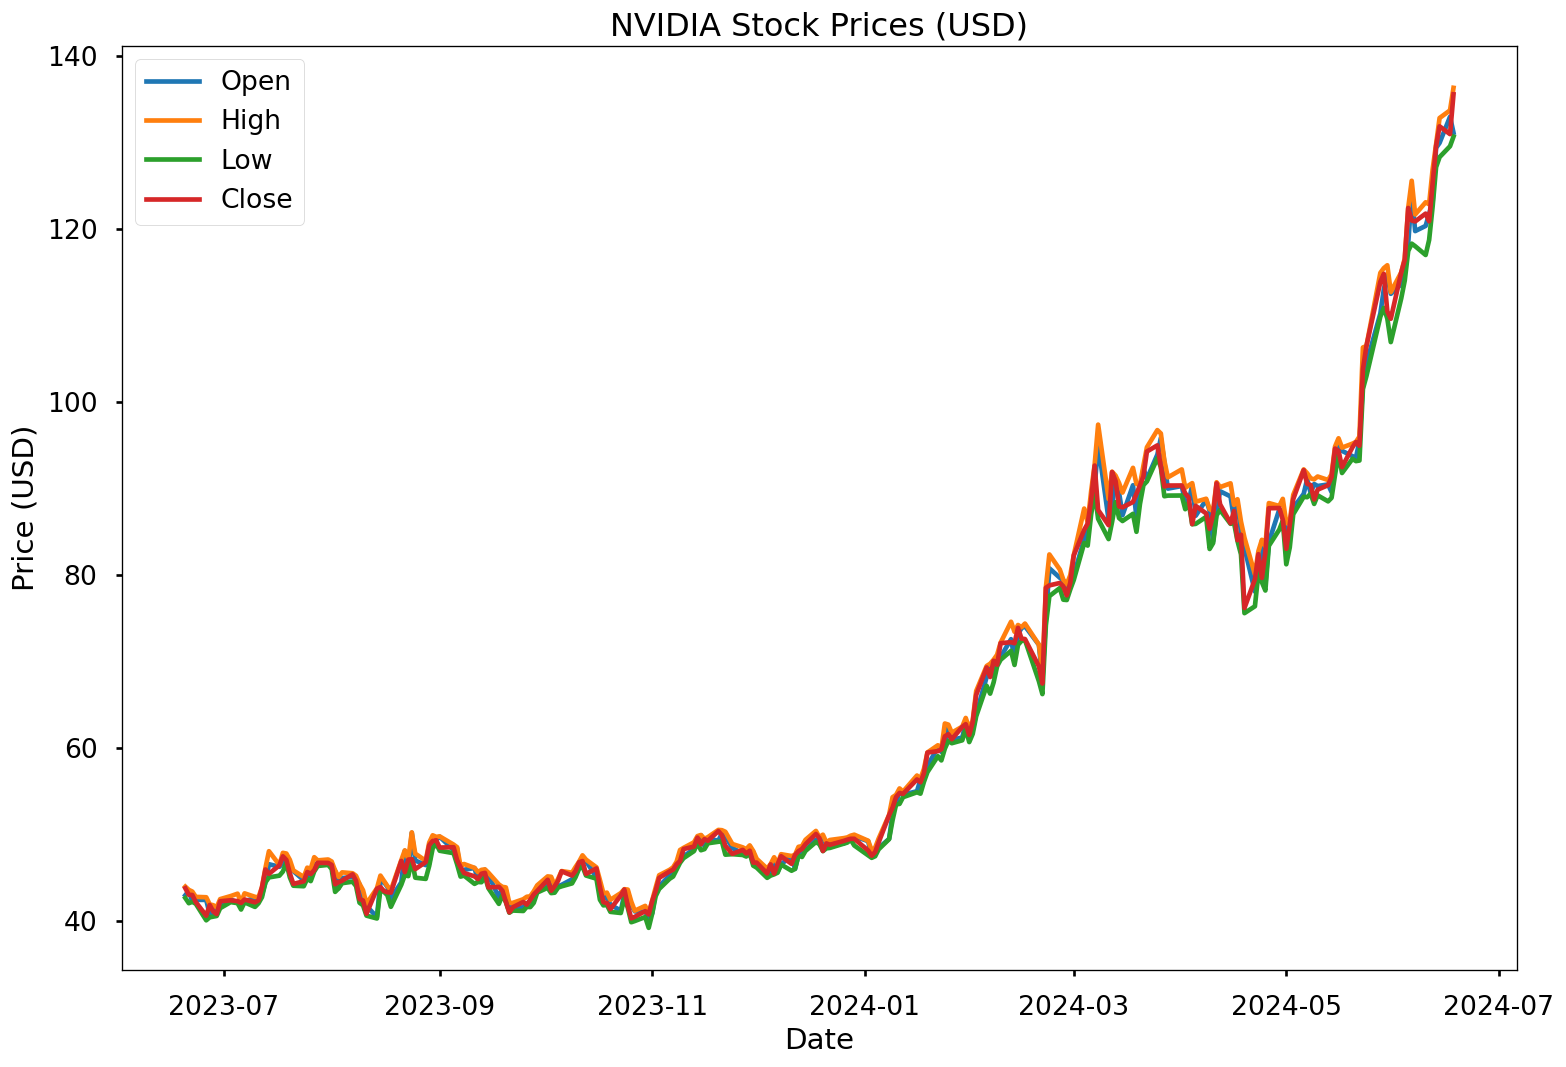

In [68]:
# Visualize the Time Series

plt.figure(figsize=(15,10))
for column in ['Open', 'High', 'Low', 'Close']:
  plt.plot(df.index, df[column], label=column)
plt.title('NVIDIA Stock Prices (USD)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [69]:
# Decomposition to understand the patterns

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Close'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

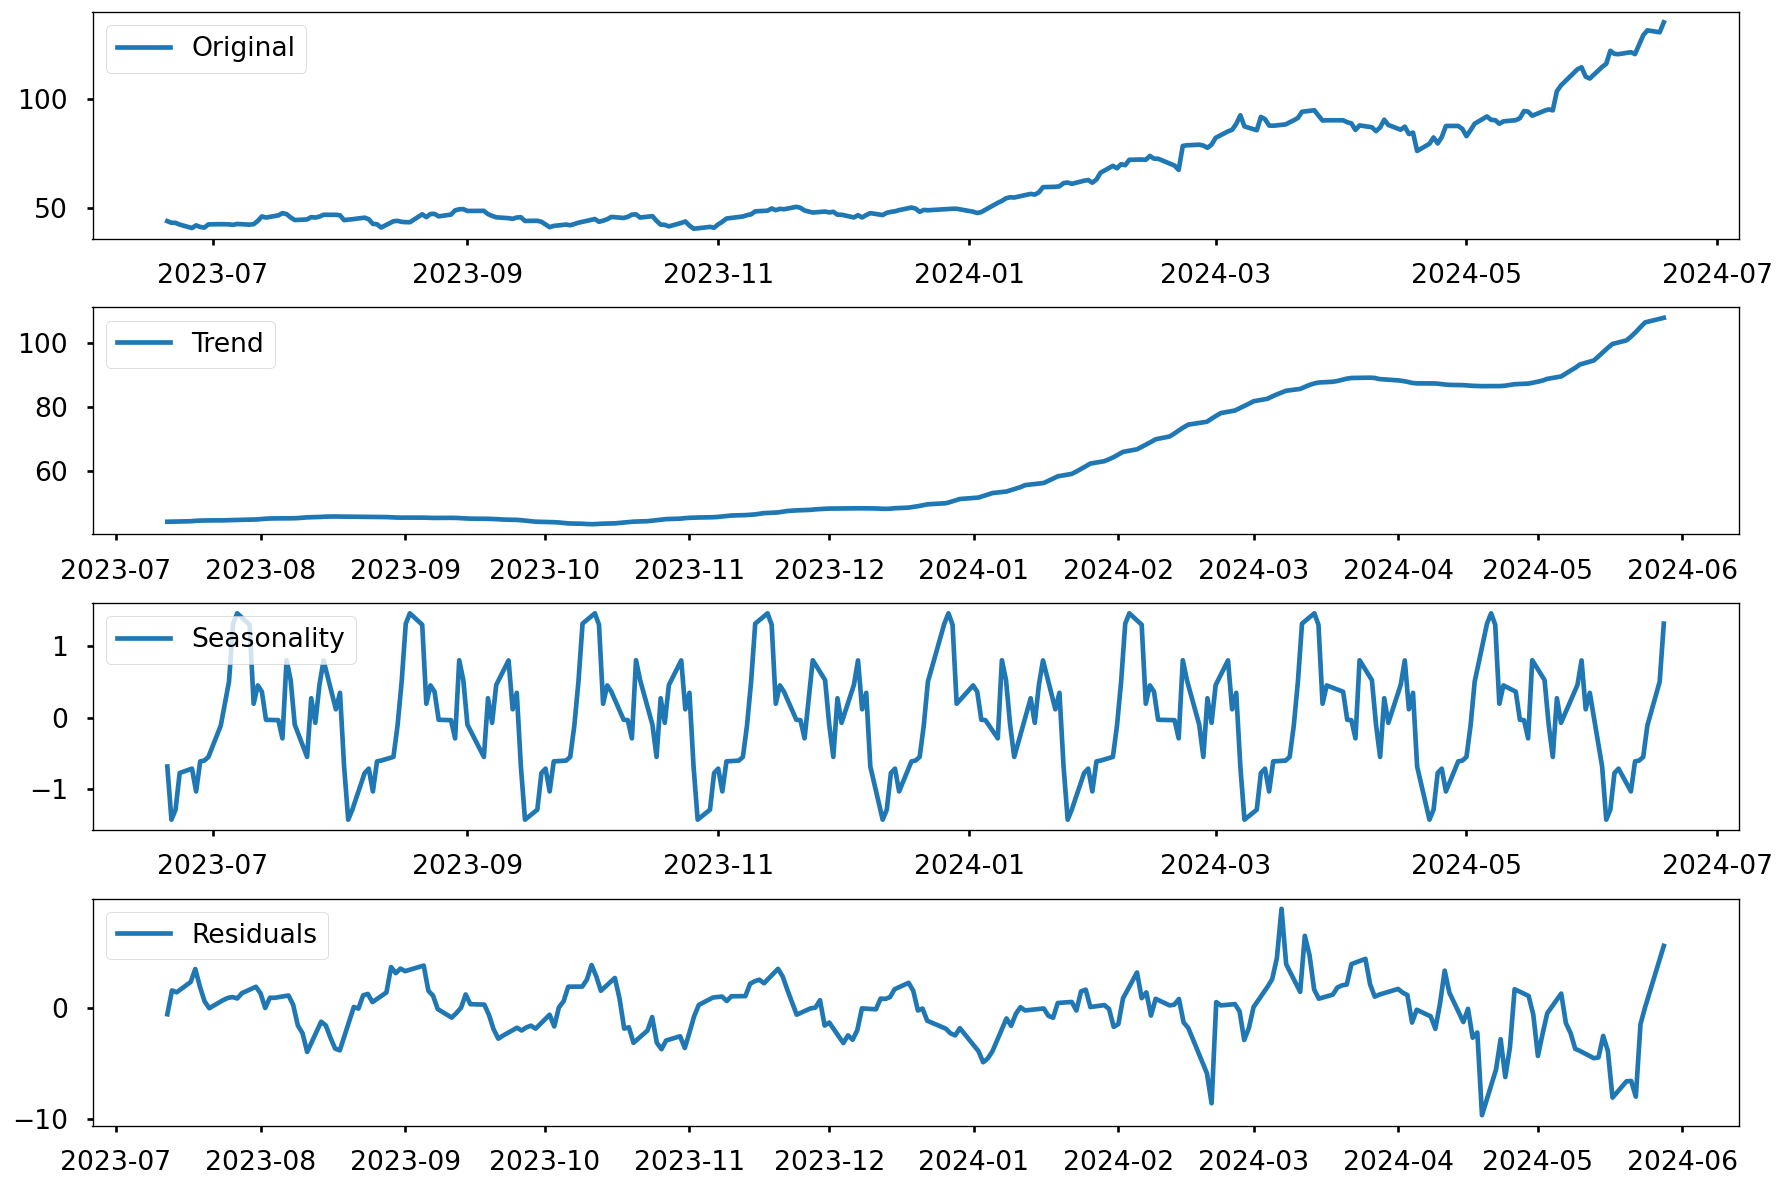

In [70]:
# Plotting the Decomposition

plt.figure(figsize=(15, 10))
plt.subplot(411)
plt.plot(df['Close'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [71]:
# Stationary Check the data

from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'])
print('ADF Statistic: ', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
  print(key, ':', value)

if result[1] <= 0.05:
  print('Data is Stationary')
else:
  print('Data is not Stationary')

ADF Statistic:  2.9180242717950238
p-value: 1.0
1% : -3.4568881317725864
5% : -2.8732185133016057
10% : -2.5729936189738876
Data is not Stationary


In [72]:
# Differencing to make the series stationary

df['Close_diff'] = df['Close'].diff()
df['Close_diff'] = df['Close_diff'].fillna(df['Close_diff'].mean())

result_diff = adfuller(df['Close_diff'])
print('ADF Statistic: ', result_diff[0])
print('p-value:', result_diff[1])
for key, value in result_diff[4].items():
  print(key, ':', value)

if result_diff[1] <= 0.05:
  print('Data is Stationary')
else:
  print('Data is not Stationary')

ADF Statistic:  -3.384312593145795
p-value: 0.011505421673952765
1% : -3.457437824930831
5% : -2.873459364726563
10% : -2.573122099570008
Data is Stationary


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

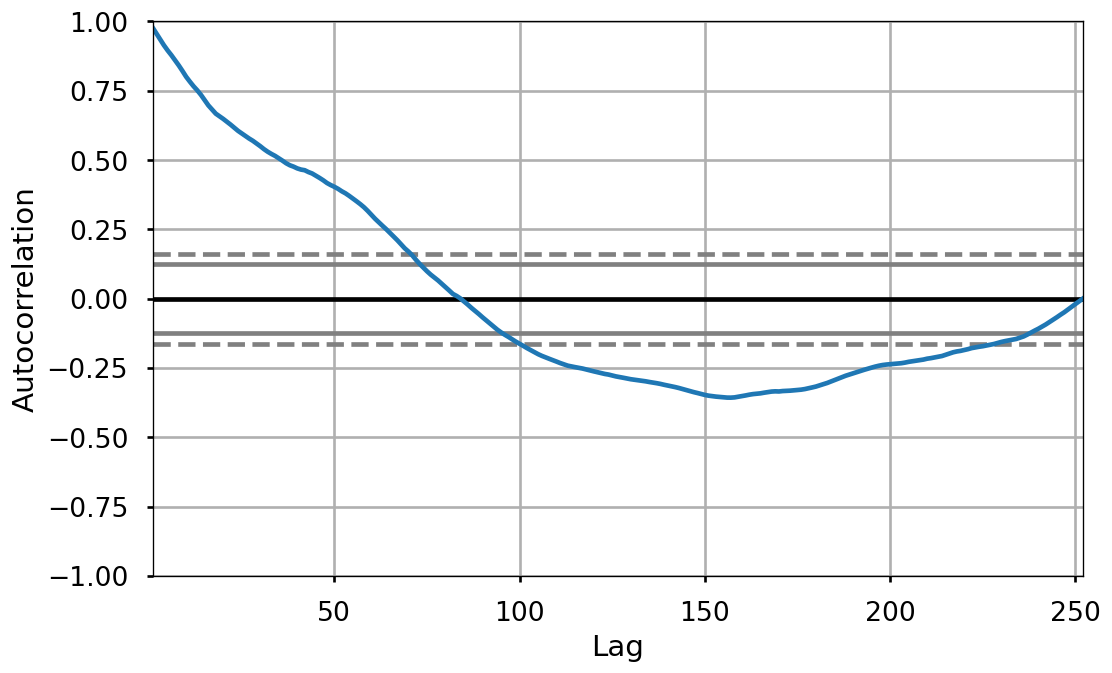

In [73]:
# Test Seasonality

from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['Close'].tolist())

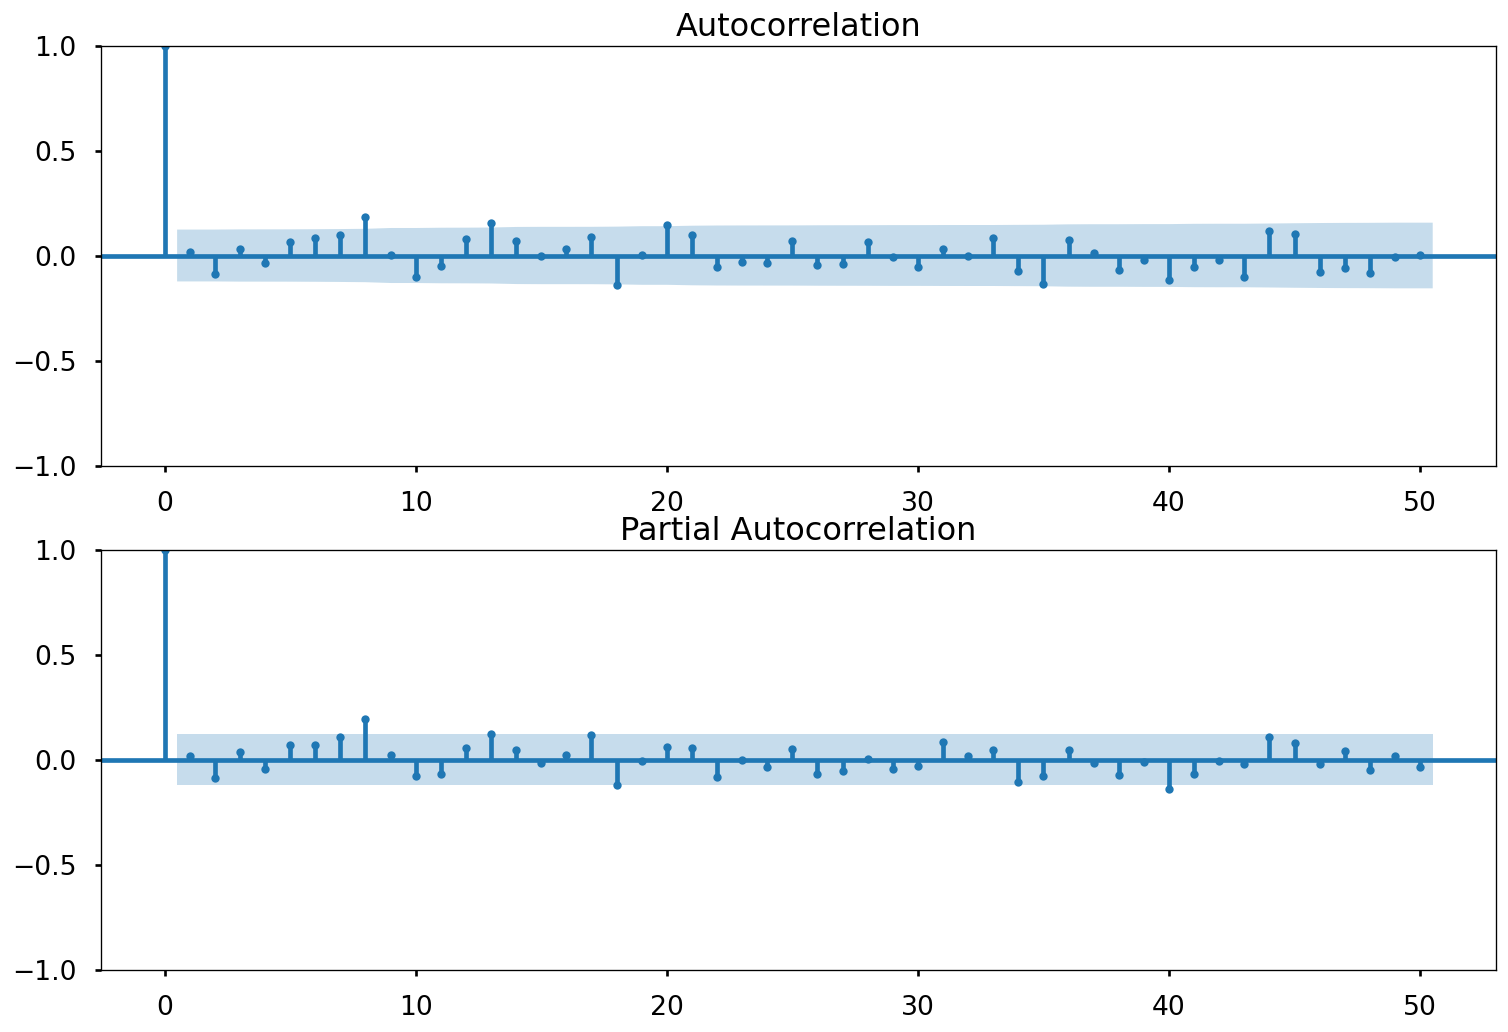

In [74]:
# Autocorrelation and Partial Autocorrelation to Determine AutoRegresive and Inegreated for ARIMA Model

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(15,10))

plt.subplot(211)
plot_acf(df['Close_diff'].tolist(), lags=50, ax=plt.gca())

plt.subplot(212)
plot_pacf(df['Close_diff'].tolist(), lags=50, ax=plt.gca())

plt.show()

# **4. Regression Model**

In [75]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[[
    'Open', 'High', 'Low', 'Volume'
]]
y = df['Close']

In [76]:
# Splitting data for train and test the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Linear Regression Model

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [78]:
# Linear Regression Model Summary

print("Intercept:", lm.intercept_)
print("Coefficients:", lm.coef_)

Intercept: -0.39470125042329585
Coefficients: [-6.41329268e-01  6.61358171e-01  9.92486012e-01  1.70372605e-10]


In [79]:
# Linear Regression Model Report

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared (Accuracy): {r2:.2%}")

Mean Squared Error: 0.45
Root Mean Squared Error: 0.67
R-squared (Accuracy): 99.89%


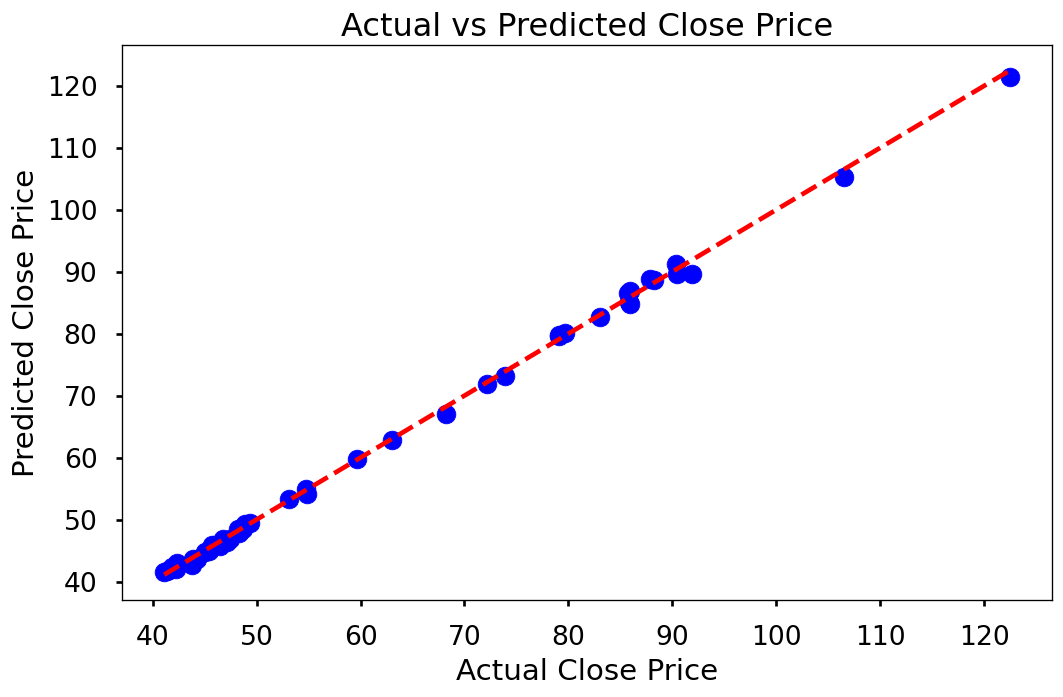

In [80]:
# Plotting the Model

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], ls='--', color='red')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.show()

# **5. ARIMA Model**

In [81]:
# Data preparation

from statsmodels.tsa.arima.model import ARIMA

close_price = df['Close']

# Model fitting on the train data

model = ARIMA(close_price, order=(1, 1, 1))
fitted_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

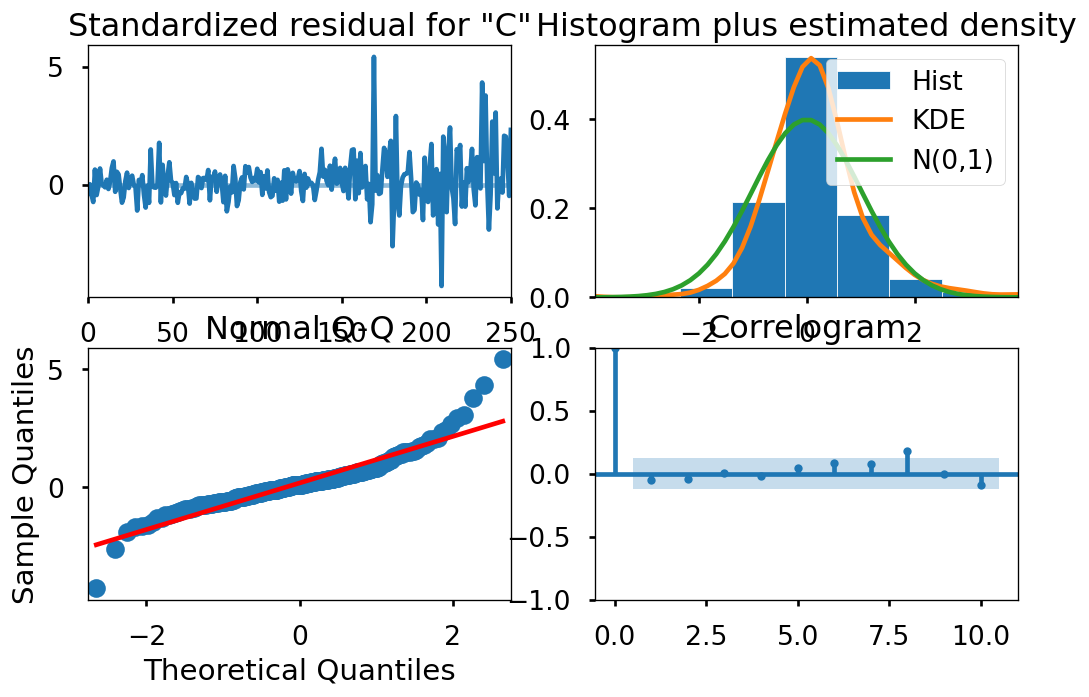

In [82]:
# ARIMA summary plot

fitted_model.plot_diagnostics()
plt.show()

In [83]:
# Calculate error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

pred_steps = len(close_price)
pred = fitted_model.forecast(steps=pred_steps)

mae = mean_absolute_error(close_price, pred)
rmse = np.sqrt(mean_squared_error(close_price, pred))
mse = mean_squared_error(close_price, pred)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MSE: {mse:.2f}')

MAE: 72.21
RMSE: 76.06
MSE: 5785.74


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [84]:
# Forecast using model for next week price

forecast_steps = 7
forecast = fitted_model.get_forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [85]:
# Extract forecasted values and assign index

last_date = close_price.index[-1]
forecast_index = pd.date_range(start=last_date, periods=forecast_steps + 1)
forecast_mean = forecast.predicted_mean
forecast_mean.index = forecast_index[1:]

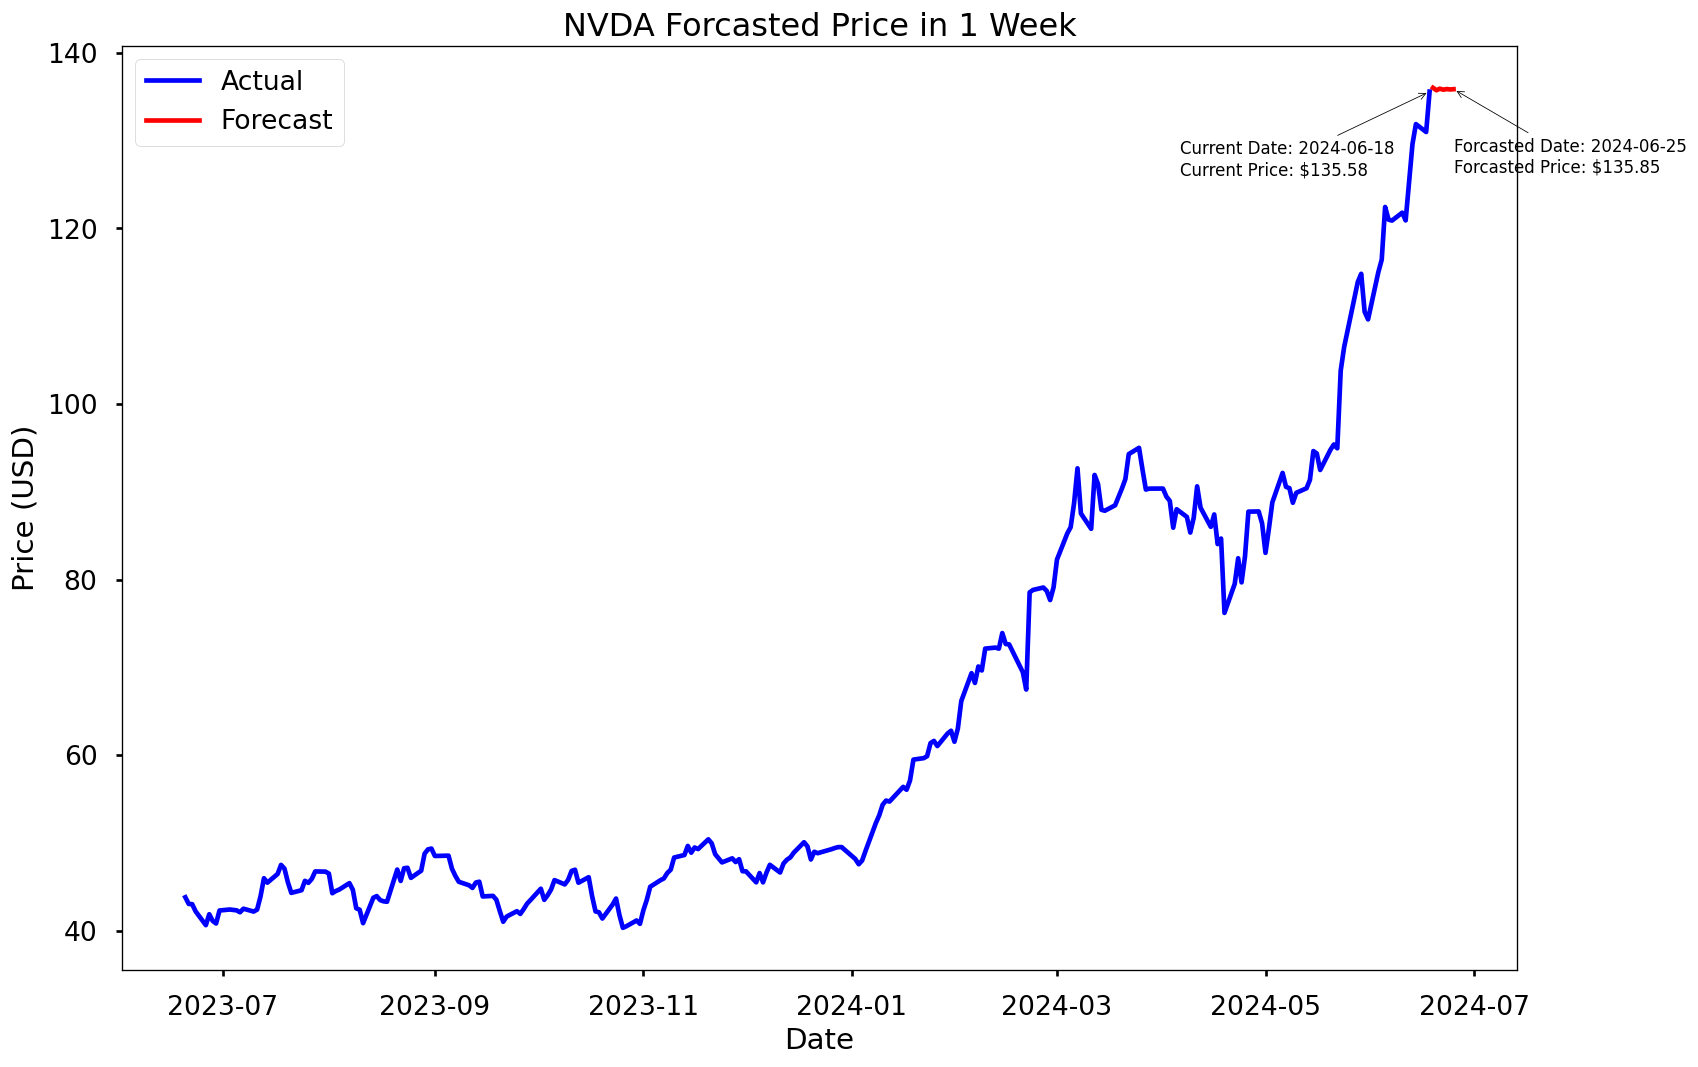

In [86]:
# Plot the actual vs predicted values

plt.figure(figsize=(15, 10))
plt.plot(close_price.index,close_price, label='Actual', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.title('NVDA Forcasted Price in 1 Week')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

# Annotate last Actual value on the plot
last_ac_date = close_price.index[-1]
last_ac_value = close_price.iloc[-1]
plt.annotate(f'Current Date: {last_ac_date.strftime("%Y-%m-%d")}\nCurrent Price: ${last_ac_value:.2f}', xy=(last_ac_date, last_ac_value), xytext=(-150, -50),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='black'))

# Annotate last forecasted value on the plot
last_date = forecast_mean.index[-1]
last_value = forecast_mean.iloc[-1]
plt.annotate(f'Forcasted Date: {last_date.strftime("%Y-%m-%d")}\nForcasted Price: ${last_value:.2f}', xy=(last_date, last_value), xytext=(0, -50),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='black'))

plt.show()